In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as nSAp # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('dataset/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

dataset/test.csv
dataset/train.csv


In [2]:
import warnings
warnings.filterwarnings('ignore')

import scipy
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


In [3]:
train_df = pd.read_csv('dataset/train.csv')
test_df = pd.read_csv('dataset/test.csv')


In [4]:
train_df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test_df.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [6]:
train_df.shape, test_df.shape

((4209, 378), (4209, 377))

In [7]:
train_df['y'].describe()

count    4209.000000
mean      100.669318
std        12.679381
min        72.110000
25%        90.820000
50%        99.150000
75%       109.010000
max       265.320000
Name: y, dtype: float64

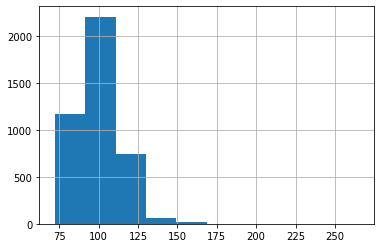

In [8]:
train_df['y'].hist();

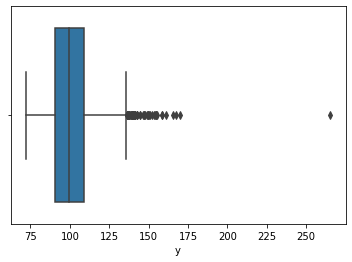

In [9]:
sns.boxplot(train_df['y']);

In [10]:
#removing of outliars 


train_df = train_df.drop(train_df[train_df['y'] > 140].index)

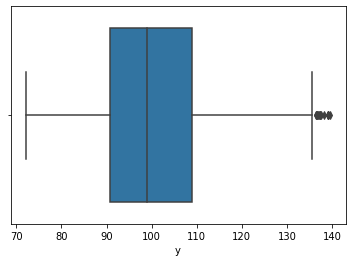

In [11]:
sns.boxplot(train_df['y']);

In [12]:
train_df.dtypes.value_counts()

int64      369
object       8
float64      1
dtype: int64

In [13]:
cat_feature = train_df.select_dtypes(include='object')
cat_feature

,X0,X1,X2,X3,X4,X5,X6,X8
0,k,v,at,a,d,u,j,o
1,k,t,av,e,d,y,l,o
2,az,w,n,c,d,x,j,x
3,az,t,n,f,d,x,l,e
4,az,v,n,f,d,h,d,n
...,...,...,...,...,...,...,...,...
4204,ak,s,as,c,d,aa,d,q
4205,j,o,t,d,d,aa,h,h
4206,ak,v,r,a,d,aa,g,e
4207,al,r,e,f,d,aa,l,u


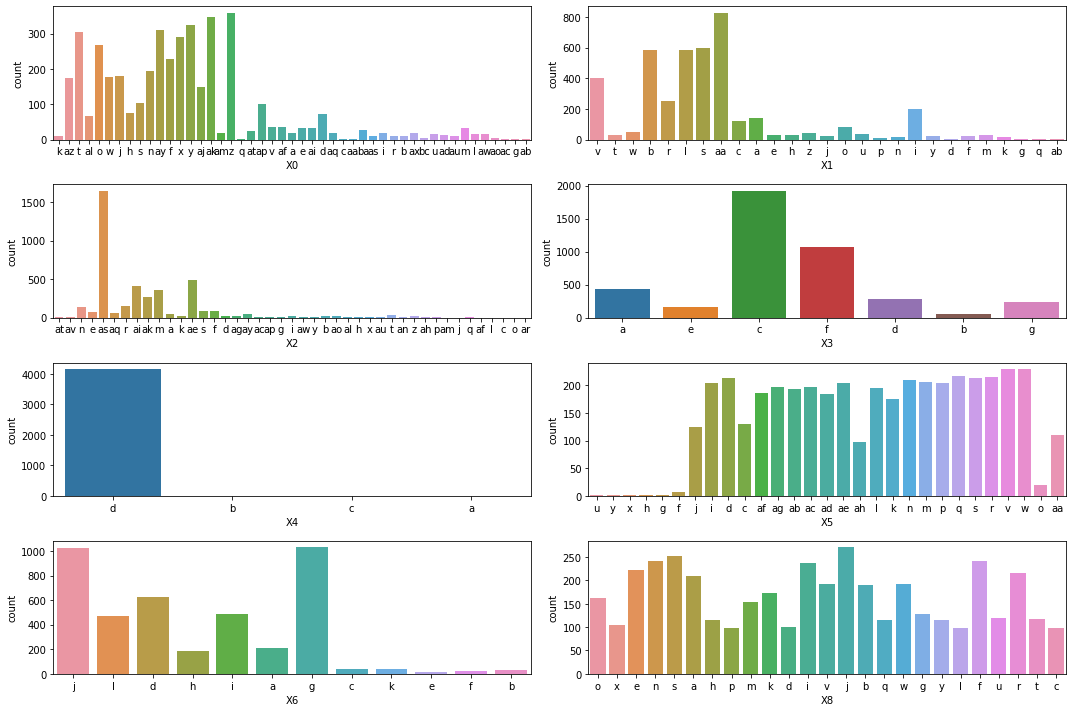

In [14]:
fig = plt.figure(figsize=(15, 10))

for index, col in enumerate(cat_feature):
    plt.subplot(4, 2, index+1)
    sns.countplot(cat_feature[col])
   

    
    
plt.tight_layout()    
plt.show(); 

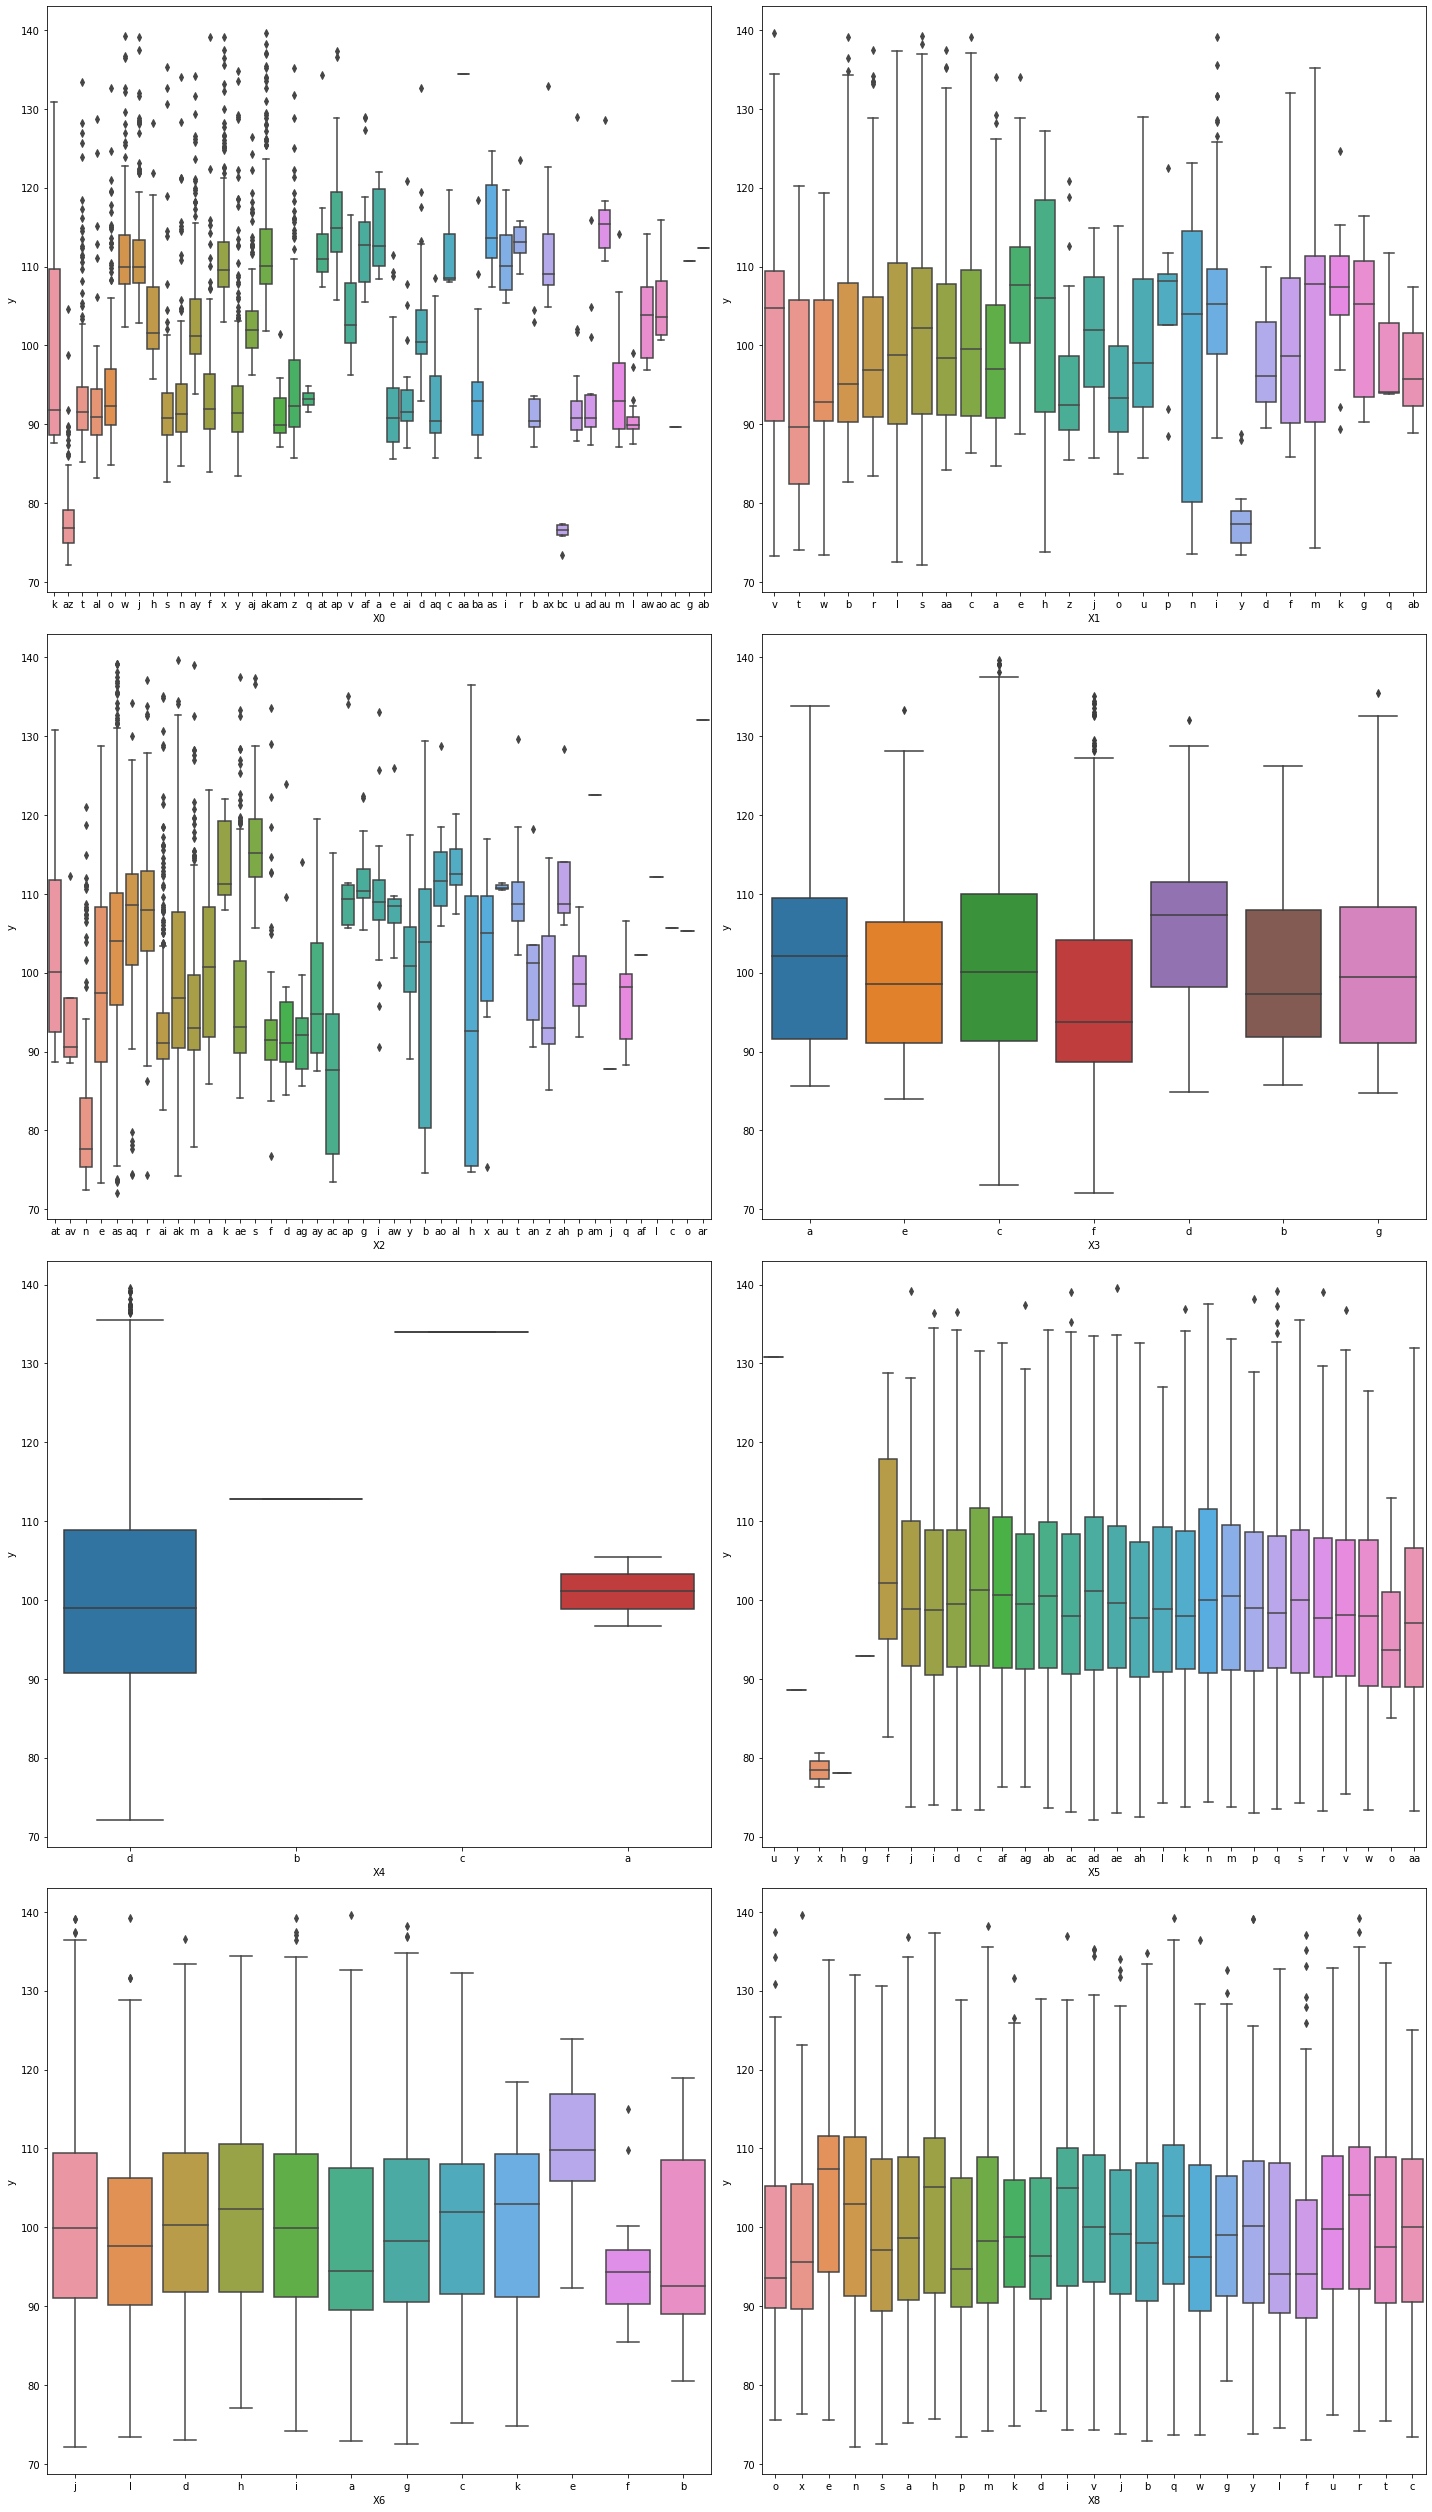

In [15]:
fig = plt.figure(figsize=(20, 35))

for index, col in enumerate(cat_feature):
    plt.subplot(4, 2, index+1)
    sns.boxplot(data=train_df, x=col, y='y')
   

    
    
plt.tight_layout()    
plt.show(); 

In [16]:
data = pd.concat([train_df, test_df])


In [17]:
data[['X0', 'X1', 'X2']]

,X0,X1,X2
0,k,v,at
1,k,t,av
2,az,w,n
3,az,t,n
4,az,v,n
...,...,...,...
4204,aj,h,as
4205,t,aa,ai
4206,y,v,as
4207,ak,v,as


In [18]:
def code_сount(dataset, feature):
    dict = dataset[feature].value_counts().to_dict()
    dataset[feature] = dataset[feature].map(dict)
    
    return dataset[feature] 
        

In [19]:
for feature in data[['X0', 'X1', 'X2']]:
    code_сount(data, feature)

In [20]:
'''data = pd.concat([data, pd.get_dummies(data[['X0', 'X1', 'X2']])], axis=1)'''

"data = pd.concat([data, pd.get_dummies(data[['X0', 'X1', 'X2']])], axis=1)"

In [21]:
data = data.drop(columns=['X3', 'X4', 'X5', 'X6', 'X8'])

In [22]:
'''data.drop(columns=['X0', 'X1', 'X2'], inplace=True)'''

"data.drop(columns=['X0', 'X1', 'X2'], inplace=True)"

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8383 entries, 0 to 4208
Columns: 373 entries, ID to X385
dtypes: float64(1), int64(372)
memory usage: 23.9 MB


In [24]:
num_features = train_df.select_dtypes(exclude='object').head()
num_features.head()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
'''num_features.describe()'''

'num_features.describe()'

In [26]:
'''num_nul_var = []
for col in num_features:
    if train_df[col].var() == 0:
        num_nul_var.append(col)
        print(col, train_df[col].var())'''

'num_nul_var = []\nfor col in num_features:\n    if train_df[col].var() == 0:\n        num_nul_var.append(col)\n        print(col, train_df[col].var())'

In [27]:
'''data.drop(columns=num_nul_var, inplace=True)'''

'data.drop(columns=num_nul_var, inplace=True)'

In [28]:
train_df = data[:train_df.shape[0]]

In [29]:
test_df =  data[train_df.shape[0]:]


In [30]:
X = train_df.drop(columns=['ID', 'y'])
y = train_df['y']
X_test = test_df.drop(columns=['ID', 'y'])


In [31]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42)

In [32]:
rf = RandomForestRegressor(max_depth=5, min_samples_leaf=3, n_estimators=145,
                      n_jobs=-1, random_state=1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)

r2_score(y_val, y_pred)

0.6126267480366778

In [33]:
'''params= {'max_depth': list(range(5,21, 1)), 
              'min_samples_leaf': list(range(1,6, 1)),
              'n_estimators': [145], 'n_jobs': [-1], 'random_state': [1]}


cv_rf = GridSearchCV(RandomForestRegressor(), params)

cv_rf.fit(X_train, y_train)
y_pred = cv_rf.predict(X_val)

r2_score(y_val, y_pred), cv_rf.best_estimator_'''

"params= {'max_depth': list(range(5,21, 1)), \n              'min_samples_leaf': list(range(1,6, 1)),\n              'n_estimators': [145], 'n_jobs': [-1], 'random_state': [1]}\n\n\ncv_rf = GridSearchCV(RandomForestRegressor(), params)\n\ncv_rf.fit(X_train, y_train)\ny_pred = cv_rf.predict(X_val)\n\nr2_score(y_val, y_pred), cv_rf.best_estimator_"

In [34]:
model = RandomForestRegressor(max_depth=5, min_samples_leaf=3, n_estimators=145,
                      n_jobs=-1, random_state=1)

model.fit(X, y)
predict = model.predict(X_test)
print(predict)

[ 77.88237674  93.84218364  77.43634294 ...  93.76928174 111.49805528
  93.80689513]


In [35]:
output = pd.DataFrame({'ID': test_df.ID, 'y': predict})
output.to_csv('mercedes_benz_baseline.csv', index=False)

In [36]:
results = pd.read_csv('mercedes_benz_baseline.csv')
print(results)

        ID           y
0        1   77.882377
1        2   93.842184
2        3   77.436343
3        4   78.014133
4        5  112.151172
...    ...         ...
4204  8410  102.994275
4205  8411   94.233831
4206  8413   93.769282
4207  8414  111.498055
4208  8416   93.806895

[4209 rows x 2 columns]


In [45]:
pd.set_option('display.max_rows', results.shape[0]+1)
print(results.y, results.ID)

0        77.882377
1        93.842184
2        77.436343
3        78.014133
4       112.151172
5        93.749262
6       111.587836
7        93.818794
8       116.589011
9        93.847504
10      116.589011
11      110.148810
12       95.790964
13       93.846421
14      104.490001
15       95.790964
16      117.344099
17       95.790964
18       94.135646
19       94.337788
20       95.790964
21       95.790964
22       94.120901
23       95.790964
24       93.841601
25      116.124245
26      102.304054
27      103.413481
28       93.879517
29       77.446324
30      112.353327
31       93.827675
32      104.046898
33       94.141130
34      103.471145
35      111.532533
36       93.867250
37      105.163110
38       94.101436
39       94.311731
40      103.649601
41       93.892610
42      103.461979
43      103.860784
44      114.864825
45       93.892610
46      105.163110
47       93.915981
48      103.047468
49      111.613740
50       95.790964
51      111.618432
52       93.